#### Business Problem
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a resutl, including fewer renenues and less than ideal hotel room use. Consequently, lowering cancelleation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thoroough business advice to address this problem.

#### Assumptions
1. The information is still current and can be used to analyse a hotel's possible plans in an efficient manner.
2. The hotels are not currenlty using any of the suggested solutions.
3. The biggest factor affecting the effectiveness of earning income is booking cancellations.
4. Cancellations result in vacant room for the booked lenght of time.

#### Research Question:
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

#### Hypothesis:
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

### Step 1: Importing libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Step 2: Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Hotel_Booking/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# null value treatment
df = df[~df['country'].isna()]
df.drop(['agent','company'], axis=1, inplace=True)
df.isnull().sum().sum()

4

In [ ]:
df = df[~df['children'].isna()]
df.isna().sum().sum()
df.dropna(inplace=True)

In [ ]:
# extracting new columns
obje_columns = df.select_dtypes(include='object')
obje_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    118898 non-null  object
 1   arrival_date_month       118898 non-null  object
 2   meal                     118898 non-null  object
 3   country                  118898 non-null  object
 4   market_segment           118898 non-null  object
 5   distribution_channel     118898 non-null  object
 6   reserved_room_type       118898 non-null  object
 7   assigned_room_type       118898 non-null  object
 8   deposit_type             118898 non-null  object
 9   customer_type            118898 non-null  object
 10  reservation_status       118898 non-null  object
 11  reservation_status_date  118898 non-null  object
 12  name                     118898 non-null  object
 13  email                    118898 non-null  object
 14  phone-number        

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# let's convert reservation_status_date into datetime to extract month, year and weekdays
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,81234,115425,118898,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,669-792-1661,************3627
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,48,6,1,28


In [ ]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*100)

hotel
['Resort Hotel' 'City Hotel']
____________________________________________________________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
____________________________________________________________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
____________________________________________________________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'I

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['adr'].describe()  # average daily rate (adr)
# range: -6 to 5400

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

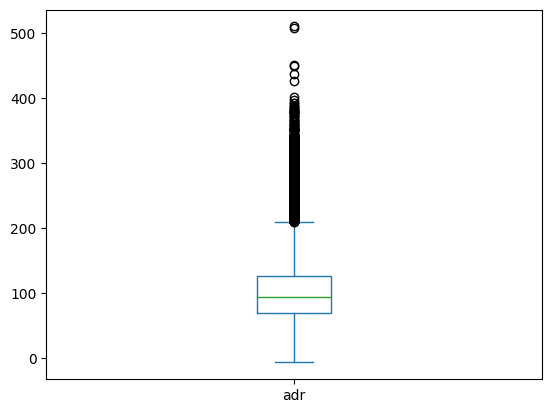

In [ ]:
# let's check the outlier in adr
df['adr'].plot(kind='box')  # 5400 is the single outlier
df = df[df['adr']<5000]

<Axes: >

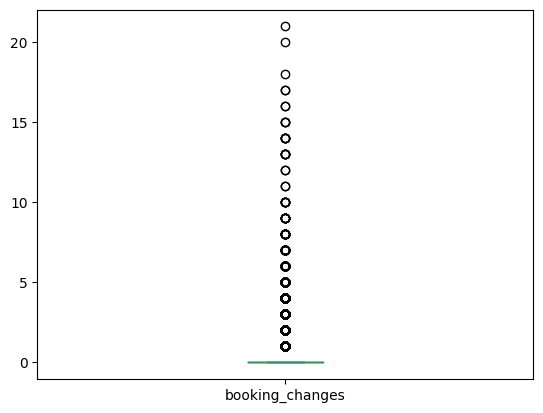

In [ ]:
df['booking_changes'].plot(kind='box')

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


#### Data visualization

(0, 62.87) %
(1, 37.13) %
0: not cancelled
1: cancelled


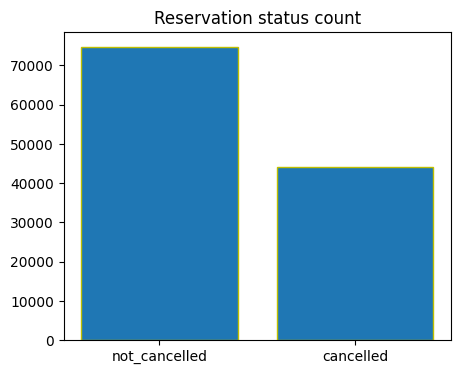

In [ ]:
# let's first visualize the count of cancellation
cancelled_perc = df.is_canceled.value_counts(normalize=True)
for i, elem in enumerate(cancelled_perc):
    print(f'{i, round(elem*100,2)} %')
print('0: not cancelled')
print('1: cancelled')

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['not_cancelled','cancelled'], df.is_canceled.value_counts(), edgecolor='y', width=0.8)
plt.show()

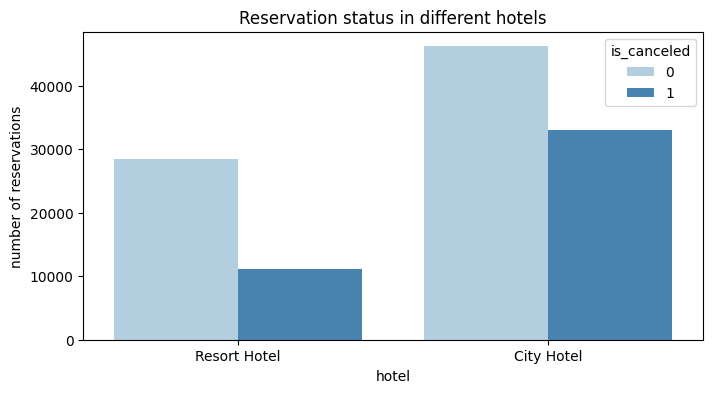

In [ ]:
# now let's see the cancellation by hotel type
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
plt.title('Reservation status in different hotels')
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()

(0, 72.02) %
(1, 27.98) %
0: not cancelled
1: cancelled


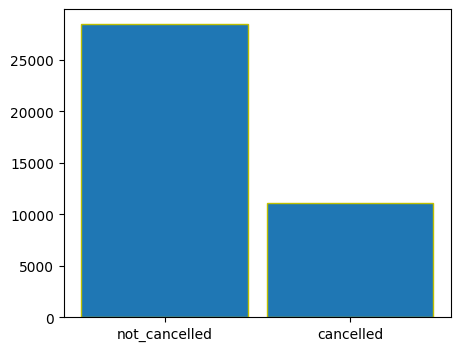

In [ ]:
resort_hotel = df[df['hotel']=='Resort Hotel']
cancel_perc_re = resort_hotel['is_canceled'].value_counts(normalize=True)

for i, elem in enumerate(cancel_perc_re):
    print(f'{i, round(elem*100,2)} %')
print('0: not cancelled')
print('1: cancelled')

plt.figure(figsize=(5,4))
plt.bar(['not_cancelled','cancelled'], resort_hotel['is_canceled'].value_counts(),edgecolor='y', width=0.9)
plt.show()

(0, 58.29) %
(1, 41.71) %
0: not cancelled
1: cancelled


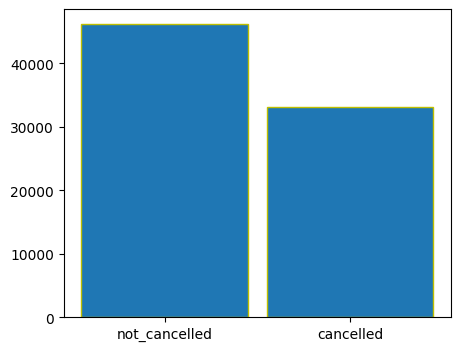

In [ ]:
city_hotel = df[df['hotel']=='City Hotel']
cancel_perc_re = city_hotel['is_canceled'].value_counts(normalize=True)

for i, elem in enumerate(cancel_perc_re):
    print(f'{i, round(elem*100,2)} %')
print('0: not cancelled')
print('1: cancelled')

plt.figure(figsize=(5,4))
plt.bar(['not_cancelled','cancelled'], city_hotel['is_canceled'].value_counts(),edgecolor='y', width=0.9)
plt.show()

In [ ]:
resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel_adr

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [ ]:
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


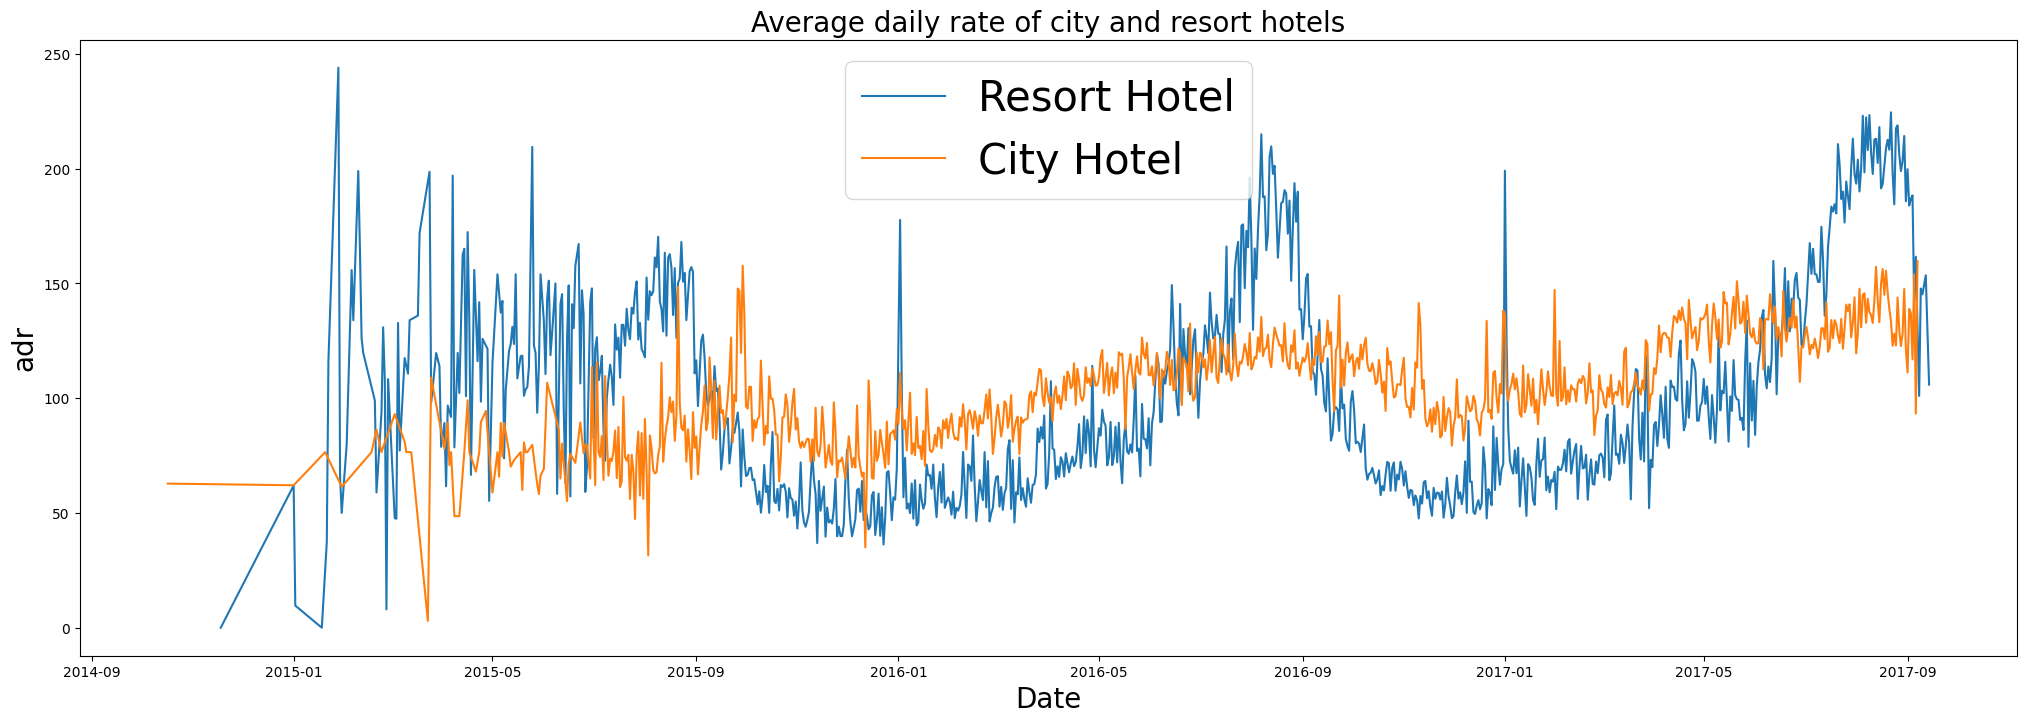

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Average daily rate of city and resort hotels', fontsize=20)
plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel')
plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel')
plt.xlabel('Date', fontsize=20)
plt.ylabel('adr', fontsize=20)
plt.legend(fontsize=30)
plt.show()

### To be continued....